In [59]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
%matplotlib inline

In [60]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import re as re

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [123]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [63]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier

In [64]:
from sklearn.svm import SVC
from sklearn.cross_validation import KFold;

In [65]:
train = pd.read_csv("/home/vivek/Documents/Datasets/Titanic/train.csv")
test = pd.read_csv("/home/vivek/Documents/Datasets/Titanic/test.csv")

In [66]:
train.shape,test.shape

((891, 12), (418, 11))

## Featrure Exploration, Engineering and Cleaning 

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
# Store our passanger ID for easy access( storing only passanger IDs)
PassengerId = test['PassengerId']

In [70]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

# Feature Engineering

In [71]:
# as_index = True means will take Pclass as index and if false then will include index as reference
train[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [72]:
train[['Sex', "Survived"]].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [73]:
# to make whole data set
fulldata = [train,test]

In [74]:
# with the number of siblings/spouse and number of children/parents we can create new variable called Family size
# we summed up SibSp + Parch + 1(own-self) in the family size
for dataset in fulldata:
    dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1
train[['Family_Size','Survived']].groupby(['Family_Size'],as_index = False).mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


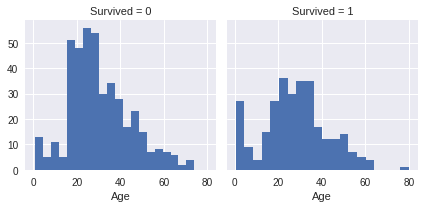

In [75]:
g = sns.FacetGrid(train,col='Survived')
g.map(plt.hist,'Age', bins = 20)

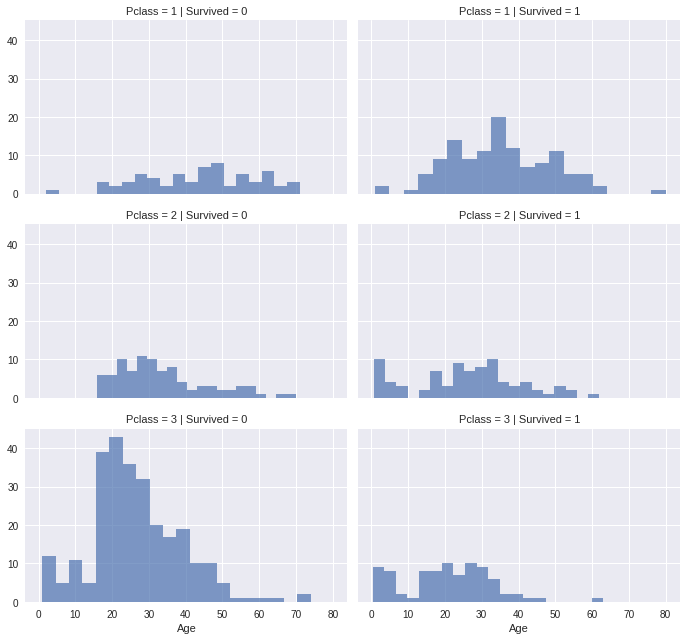

In [76]:
grid = sns.FacetGrid(train, col = 'Survived',row = 'Pclass', size = 3.0, aspect=1.6)
grid.map(plt.hist, 'Age', alpha = 0.7, bins = 20)
grid.add_legend();

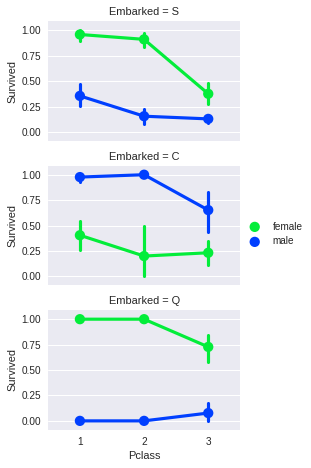

In [77]:
grid  = sns.FacetGrid(train,row = 'Embarked', size = 2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass','Survived','Sex',palette = 'bright')
grid.add_legend();

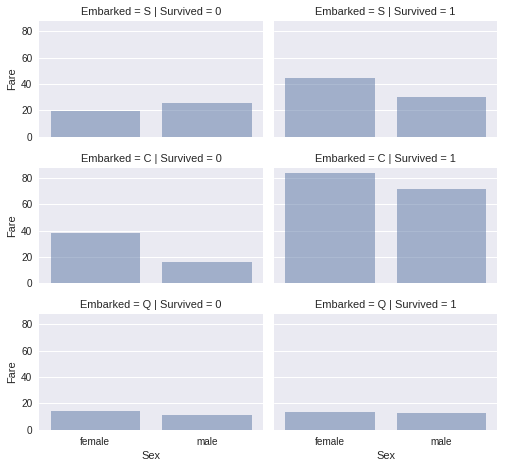

In [78]:
grid = sns.FacetGrid(train,row = 'Embarked',col = 'Survived', size = 2.2, aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=0.5, ci = None)
grid.add_legend();

In [79]:
train = train.drop(['Cabin','Ticket'], axis=1)
test = test.drop(['Cabin','Ticket'],axis=1)

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [81]:
fulldata = [train,test];
def get_title(name):
    title_search = re.search( ' ([A-Za-z]+)\.', name) # if title exists, extract and return it.
    if title_search:
        return title_search.group(1) # here group(1) means will return only first value of that name
    return ""

for dataset in fulldata:
    dataset['Title'] = dataset['Name'].apply(get_title)

pd.crosstab(train['Title'], train['Sex'])                                         

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [82]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [83]:
fulldata = [train,test];
for dataset in fulldata:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [84]:
train.shape, test.shape

((891, 12), (418, 11))

In [85]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Mr


In [86]:
train.shape, test.shape

((891, 12), (418, 11))

In [87]:
fulldata = [train,test]

In [88]:
fulldata = [train,test]
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in fulldata:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset["Title"] = dataset['Title'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


In [89]:
train = train.drop(['Name','PassengerId'],axis = 1)
test = test.drop(['Name','PassengerId'],axis = 1)
fulldata=  [train,test]
train.shape, test.shape

((891, 10), (418, 9))

In [90]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title
0,3,male,34.5,0,0,7.8292,Q,1,1
1,3,female,47.0,1,0,7.0000,S,2,3
2,2,male,62.0,0,0,9.6875,Q,1,1
3,3,male,27.0,0,0,8.6625,S,1,1
4,3,female,22.0,1,1,12.2875,S,3,3


In [91]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title
0,0,3,male,22.0,1,0,7.2500,S,2,1
1,1,1,female,38.0,1,0,71.2833,C,2,3
2,1,3,female,26.0,0,0,7.9250,S,1,2
3,1,1,female,35.0,1,0,53.1000,S,2,3
4,0,3,male,35.0,0,0,8.0500,S,1,1


In [92]:
for dataset in fulldata:
    dataset['Sex'] = dataset['Sex'].map({'male':0, 'female':1}).astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title
0,0,3,0,22.0,1,0,7.2500,S,2,1
1,1,1,1,38.0,1,0,71.2833,C,2,3
2,1,3,1,26.0,0,0,7.9250,S,1,2
3,1,1,1,35.0,1,0,53.1000,S,2,3
4,0,3,0,35.0,0,0,8.0500,S,1,1


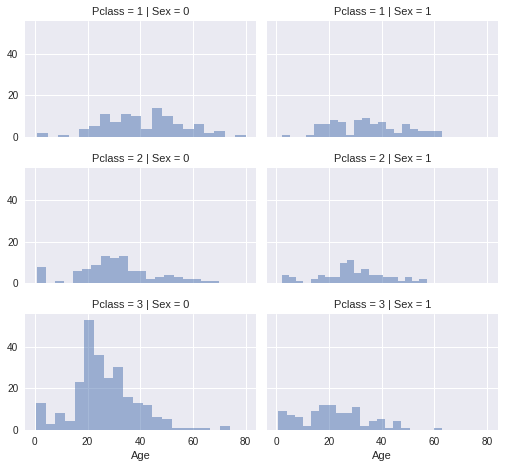

In [93]:
grid = sns.FacetGrid(train, row = 'Pclass',col = 'Sex', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend();

In [94]:
for dataset in fulldata:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16)&(dataset['Age']<=32),'Age'] = 1
    dataset.loc[(dataset['Age'] >32)&(dataset['Age']<=48),'Age'] = 2
    dataset.loc[(dataset['Age'] >48)&(dataset['Age']<=64),'Age'] = 3
    dataset.loc[dataset['Age'] >64,'Age'] = 4
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title
0,0,3,0,1.0,1,0,7.2500,S,2,1
1,1,1,1,2.0,1,0,71.2833,C,2,3
2,1,3,1,1.0,0,0,7.9250,S,1,2
3,1,1,1,2.0,1,0,53.1000,S,2,3
4,0,3,0,2.0,0,0,8.0500,S,1,1


### Age (IMP - How to fill large number of missing values (one of technique for age)) 
We have plenty of missing values in this feature. We would generate random numbers between (mean - std) and (mean + std). Then we categories into 5 ranges.

In [95]:
for dataset in fulldata:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
                                                        # here size means availabel null values in age feature
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size = age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['Categorical_Age'] = pd.cut(train['Age'],5)
train[['Categorical_Age','Survived']].groupby(['Categorical_Age'],as_index = False).mean()

,Categorical_Age,Survived
0,"(-0.004, 0.8]",0.386282
1,"(0.8, 1.6]",0.369942
2,"(1.6, 2.4]",0.404255
3,"(2.4, 3.2]",0.434783
4,"(3.2, 4.0]",0.090909


In [98]:
fulldata = [train,test]

In [101]:
# check whether they are alone in the ship or not
for dataset in fulldata:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Family_Size'] == 1 , "IsAlone"] = 1    # find that where 'Family_Size == 1 put that value
                                                                # in "IsAlone = 1
print (train[['IsAlone','Survived']].groupby(["IsAlone"], as_index = False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [102]:
# Check out which value is common in Embarked feature
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [103]:
for dataset in fulldata:
    dataset['Embarked'] = dataset['Embarked'].fillna('S');
train[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [104]:
for dataset in fulldata:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Title,IsAlone
0,0,3,0,1,1,0,7.2500,0,2,1,0
1,1,1,1,2,1,0,71.2833,1,2,3,0
2,1,3,1,1,0,0,7.9250,0,1,2,1
3,1,1,1,2,1,0,53.1000,0,2,3,0
4,0,3,0,2,0,0,8.0500,0,1,1,1


In [105]:
train = train.drop(['Parch','SibSp','Family_Size'],axis = 1)

In [106]:
test = test.drop(["Parch",'SibSp','Family_Size'],axis=1)

In [107]:
fulldata = [train,test]
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


In [108]:
# Fare - we also have missing values in fare and we will replace it median values
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [109]:
# Create categorical bins for fare, we will create 4 bins for fare with the use of pd.qcut
train['Categorical_Fare'] = pd.qcut(train['Fare'],4);
train[['Categorical_Fare','Survived']].groupby(["Categorical_Fare"],as_index = False).mean()

,Categorical_Fare,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [110]:
fulldata = [train,test]

In [111]:
for dataset in fulldata:
    dataset.loc[ dataset['Fare']<=7.91, "Fare"] = 0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454), "Fare"] = 1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31), "Fare"] = 2
    dataset.loc[ dataset['Fare']>31, "Fare"] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(["Categorical_Fare"],axis=1)


train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [112]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,0,2,0,2,1,1
1,3,1,2,0,0,3,0
2,2,0,3,1,2,1,1
3,3,0,1,1,0,1,1
4,3,1,1,1,0,3,0


## Model, Predict and Solve

In [113]:
X_train = train.drop("Survived", axis=1)
Y_train = train['Survived']
X_test = test
X_train.shape, Y_train.shape, test.shape

((891, 7), (891,), (418, 7))

In [114]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train) * 100,2)
acc_log

79.349999999999994

In [115]:
coeff = pd.DataFrame(train.columns.delete(0)) # will delete first column of the made dataframe( )
coeff.columns = ['Features'] # make above column as with name "Features"
coeff["Correlation"] = pd.Series(logreg.coef_[0]) # find the highest correaltion
coeff.sort_values(by="Correlation", ascending=False) # sorting the values

,Features,Correlation
1,Sex,2.177342
5,Title,0.425206
4,Embarked,0.239525
6,IsAlone,0.109592
3,Fare,-0.029070
2,Age,-0.296019
0,Pclass,-1.084296


In [118]:
# SVM
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train) * 100, 2)
acc_svc

84.060000000000002

In [119]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train,Y_train) * 100,2)
acc_knn

84.620000000000005

In [121]:
# Gaussian Naive Bayes
gaussian  = GaussianNB()
gaussian.fit(X_train,Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train,Y_train) * 100, 2)
acc_gaussian

76.989999999999995

In [124]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train,Y_train) * 100, 2)
acc_perceptron

78.0

In [128]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train,Y_train) * 100, 2)
acc_linear_svc

78.450000000000003

In [129]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train,Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train,Y_train) * 100, 2)
acc_sgd

78.450000000000003

In [131]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) *100,2)
acc_decision_tree

87.430000000000007

In [132]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.430000000000007

In [133]:
models = pd.DataFrame({'Model':["Support Vector Machines", "KNN", "Logistic Regression","Random Forest", 'Naive Bayes',
                               "Perceptron", "Stochastic Gradinent Descent", "Linear SVC", "Decision Tree"],
                       "Score":[acc_svc,acc_knn,acc_log,acc_random_forest,acc_gaussian,acc_perceptron,acc_sgd,
                               acc_linear_svc,acc_decision_tree]})
models.sort_values(by="Score",ascending=False)

,Model,Score
3,Random Forest,87.43
8,Decision Tree,87.43
1,KNN,84.62
0,Support Vector Machines,84.06
2,Logistic Regression,79.35
6,Stochastic Gradinent Descent,78.45
7,Linear SVC,78.45
5,Perceptron,78.00
4,Naive Bayes,76.99
